Paso 1 Entender el problema

Para realizar este paso se debe consultar toda la documentación disponible por el profesor sobre el metodo de Runge-Kutta de distintos ordenes para resolver ecuaciones diferenciales ordinarias. Del mismo modo se consulta la documentación de las librerías científicas de Python Scipy donde la función solveivp incluye el metodo de Runge Kutta de cuarto orden bajo el nombre de "RK45". Este problema es importante mencionar que fue resuelto tanto analíticamente como por el metodo de Picard la semana anterior a dicha clase y se observaron los resultados.

In [53]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

valores_analitica = [1, 1.11649, 1.27356, 1.48802, 1.78936, 2.23453, 2.94948, 4.27878, 7.62278, 32.7084]

Paso 2 Configurar un plan
Para resolver este código primero debemos notar las necesidades de los parametros para la función de Scipy. Notamos que necesitamos límites inferiores, superiores para t. De igual forma se requiere un valor de y inicial en t de límite inferior.
Definimos tambien una función diferencial a resolver que llamaremos F y requerimos puntos t donde evaluar, o en nuestro caso x para poder incluir le 0.3 y obtener resultados comparables con los resultados analíticos dados por el software Mathematica de la semana pasada.

In [54]:
def F(t, y):
    '''Esta función calcula el valor de la función F que corresponde
    a la EDO de primer orden y'=F(y, t)

    Parámetros de la función
    ------------------------
    y : valor y para un punto t particular

    t : valor particular de t

    Salida de la función
    --------------------
    valorF : valor de la función evaludada
    '''
    return t + y**2

Paso 3 Ejecutar el plan
En la implememtación del plan ejecutamos la función de Scipy. Adicinalmente damos la opción de cambiar los parámetros pero teniendo en cuenta que si no se agregan funciona con parámetros por omisión. Usamos la biblioteca de Matplotlib para graficar la función con los resultados dados.

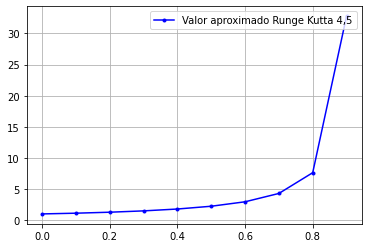

In [55]:
def implementacionRK45(t0 = 0, tLimit = 0.9):
    '''Función ejecuta el metodo de Runge-Kutta orden 4 para dar respuesta a ecuación diferencial ordinaria.

    Parámetros de la función
    ------------------------
    t0 : t inicial

    tlimit : valor de t final a ejecutar

    Salida de la función
    --------------------
    valorF : ecucaión diferencial resulta para y(t)
    '''
    resultado = integrate.solve_ivp(fun = F, t_span = (t0, tLimit), y0 = [1,], method = 'RK45', t_eval= np.arange(0, 1, 0.1))
    fig = plt.figure()
    plt.plot(resultado.t, resultado.y[0], 'b.-', label='Valor aproximado Runge Kutta 4,5')
    #plt.plot(resultado.t, valores_analitica, 'r-', label='Valor verdadero')
    plt.grid(True)
    plt.legend(loc='upper right')
    plt.show()

implementacionRK45()

Paso 4 Mirar hacia atras
Comparamos con los resultados de la solución analítica. Graficamos ambas para observar el comportamiento y comparamos el error máximo de dichas soluciones. Notamos la muy pequeña diferencia que nos ofrece utilizar el método de Runge-Kutta.

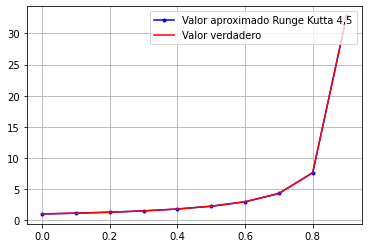

[0.00000000e+00 1.54470624e-04 1.74004115e-03 9.56997295e-06
 1.43579323e-03 2.70034341e-04 1.03121243e-04 1.10060772e-02
 3.77254357e-03 6.26092124e-02]


In [58]:
t0 = 0
tLimit = 0.9
resultado = integrate.solve_ivp(fun = F, t_span = (t0, tLimit), y0 = [1,], method = 'RK45', t_eval= np.arange(0, 1, 0.1))
fig = plt.figure()
plt.plot(resultado.t, resultado.y[0], 'b.-', label='Valor aproximado Runge Kutta 4,5')
plt.plot(resultado.t, valores_analitica, 'r-', label='Valor verdadero')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

print(max(np.abs(resultado.y-valores_analitica)))